## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv') # to read the file
df.head() #to see the top 5 entries

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
len(df) #len finds out the number of rows in this dataset

294478

c. The number of unique users in the dataset.

In [4]:
len(df.user_id.unique()) #using unique function to find unique dataset

290584

d. The proportion of users converted.

In [5]:
df.converted.sum()/len(df)

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
# Looking for entry rows where treatment/control doesn't line up with old/new pages

df_treatment = df[(df['group'] == 'treatment') & (df['landing_page'] == 'old_page')]
df_control = df[(df['group'] == 'control') & (df['landing_page'] == 'new_page')]

#adding both lengths
mismatch = len(df_treatment) + len (df_control)
mismatch_df = pd.concat([df_treatment, df_control])
mismatch


3893

f. Do any of the rows have missing values?

In [7]:
df.isnull().values.any()

False

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
# Copying dataframe in df2
df2 = df

# Removing increasing rows
mismatch_index = mismatch_df.index
df2 = df2.drop(mismatch_index)

In [9]:
# Double Checking if all of the correct rows were removed - this should come out to be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
# Finding unique user_ids
print("Unique users:", len(df2.user_id.unique()))

# Checking for non-unique users
print("Non-unique users:", len(df2)-len(df2.user_id.unique()))

Unique users: 290584
Non-unique users: 1


b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
# checking for duplicate entries
df2[df2.duplicated('user_id')]


,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [12]:
df2[df2['user_id']==773192] # there are two entries with the same user_id - 773192

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
df2.drop(labels=1899, axis=0, inplace=True) #dropping one of the duplicated entry

In [14]:
df2[df2['user_id']==773192] # checking whether dropping worked

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [15]:
print("Probability of user converting:", df2.converted.mean()) #using mean to find the  probability of an individual converting regardless of the page they receive

Probability of user converting: 0.11959708724499628


b. Given that an individual was in the `control` group, what is the probability they converted?

In [16]:
print("Probability of control group converting:", df2[df2['group']=='control']['converted'].mean())

Probability of control group converting: 0.1203863045004612


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [17]:
print("Probability of treatment group converting:", df2[df2['group']=='treatment']['converted'].mean())

Probability of treatment group converting: 0.11880806551510564


d. What is the probability that an individual received the new page?

In [18]:
print("Probability an individual recieved new page:", df2['landing_page'].value_counts()[0]/len(df2))

Probability an individual recieved new page: 0.5000619442226688


e. Use the results in the previous two portions of this question to suggest if you think there is evidence that one page leads to more conversions?  Write your response below.

Based on the probability, the control group (with old page) converted at a higher rate than the treatment (with new page). However, the magnitude of this change is very small, with a difference of only 0.2%. 

Also, the probability of an individual receiving a new page is roughly 0.5. This could not possible as there is a need to be a difference in conversion based on given data. 

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.


Hypothesis

$H_{0}$ : $p_{old}$ >=  $p_{new}$

$H_{1}$ : $p_{old}$ <  $p_{new}$


In other terms,

$H_{0}$ : $p_{new}$ <= $p_{old}$

$H_{1}$ : $p_{new}$ > $p_{old}$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

Assumming that, p(new) = p(old). Now, we can calculate the average of the real p(new) and p(old) (probability of conversion given new page and old page) to calculate p(mean).

In [21]:
p_new = df2['converted'].mean()
print(p_new)

0.11959708724499628


b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [22]:
p_old = df2['converted'].mean()
print(p_old)

0.11959708724499628


c. What is $n_{new}$?

In [23]:
n_new = len(df2.query("group == 'treatment'"))
print(n_new)

145310


d. What is $n_{old}$?

In [24]:
n_old = len(df2.query("group == 'control'"))
print(n_old)

145274


e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [25]:
new_page_converted = np.random.choice([1, 0], size=n_new, p=[p_new, (1-p_new)])
print(len(new_page_converted))

145310


f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [26]:
old_page_converted = np.random.choice([1, 0], size=n_old, p=[p_old, (1-p_old)])
print(len(old_page_converted))

145274


g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [27]:
new_page_converted = new_page_converted[:145274]
p_diff = (new_page_converted/n_new) - (old_page_converted/n_old)
print(len(p_diff))

145274


h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in **p_diffs**.

In [28]:
p_diffs = []

for _ in range(10000):
    new_page_converted = np.random.choice([1, 0], size=n_new, p=[p_new, (1-p_new)]).mean()
    old_page_converted = np.random.choice([1, 0], size=n_old, p=[p_old, (1-p_old)]).mean()
    diff = new_page_converted - old_page_converted 
    p_diffs.append(diff)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

No handles with labels found to put in legend.


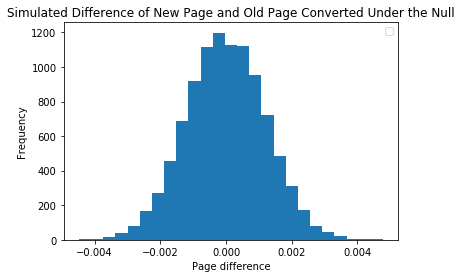

In [29]:

# Plotting histogram
plt.hist(p_diffs, bins=25)
plt.title('Simulated Difference of New Page and Old Page Converted Under the Null')
plt.xlabel('Page difference')
plt.ylabel('Frequency')
plt.legend()
plt.show()

The simulated data creates a normal distribution (almost no skew) as expected due to how the data was generated. The mean of this normal distribution is 0, which which is true for the data should look like under the null hypothesis.



j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?


In [30]:
# compute difference from original dataset ab_data.csv
act_diff = df[df['group'] == 'treatment']['converted'].mean() -  df[df['group'] == 'control']['converted'].mean()
act_diff

-0.0014795997940775518

In [31]:
p_diffs = np.array(p_diffs)
p_diffs

array([-0.00159883, -0.00188791,  0.00059679, ...,  0.00069297,
       -0.00064912, -0.00117903])

In [32]:
# The proportion of p_diffs greater than the actual difference observed in ab_data.csv is: 89%
(act_diff < p_diffs).mean()

0.892

k. In words, explain what you just computed in part **j.**.  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

We computed p-value here.
As learnt from the previous lecture videos, this is the probability of observing our statistic (or one more extreme in favor of the alternative), if the null hypothesis is true.
The more extreme in favor of the alternative portion of this statement determines the shading associated with your p-value.
Here, we find that there is not a big conversion advantage with new pages. We conclude that null hypothesis is true as old and new pages perform in a similar way.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [33]:
import statsmodels.api as sm

convert_old = len(df2[(df2['landing_page']=='old_page')&(df2['converted']==1)])
convert_new = len(df2[(df2['landing_page']=='new_page')&(df2['converted']==1)])

print("convert_old:", convert_old, 
      "\nconvert_new:", convert_new,
      "\nn_old:", n_old,
      "\nn_new:", n_new)


/Users/shipragupta/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


convert_old: 17489 
convert_new: 17264 
n_old: 145274 
n_new: 145310


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [34]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
print("z-score:", z_score, "\np-value:", p_value)

z-score: 1.3109241984234394 
p-value: 0.9050583127590245


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

In [35]:
from scipy.stats import norm

print(norm.cdf(z_score)) #Z-score significance
# for our single-sides test, assumed at 95% confidence level:

print(norm.ppf(1-(0.05))) # It tells us what our critical value at 95% confidence is 
# Here, we take the 95% values as specified in PartII.1

0.9050583127590245
1.6448536269514722


We observe that the z-score of 1.31092419842 is less than the critical value of 1.64485362695. So, we can accept the null hypothesis. The conversion rates of the old and new pages, we find that old pages are only slightly better than the new pages. These values agree with the findings in parts j. and k.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

Logistic regression

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a colun for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [45]:
df3 = df2 

df3['intercept'] = pd.Series(np.zeros(len(df3)), index=df3.index)
df3['ab_page'] = pd.Series(np.zeros(len(df3)), index=df3.index)

# Finding indexes that need to be changed for treatment group
index_to_change = df3[df3['group']=='treatment'].index

# Changing values
df3.set_value(index=index_to_change, col='ab_page', value=1)
df3.set_value(index=df3.index, col='intercept', value=1)

# Changing the datatype
df3[['intercept', 'ab_page']] = df3[['intercept', 'ab_page']].astype(int)

# Moving "converted" to RHS
df3 = df3[['user_id', 'timestamp', 'group', 'landing_page', 'ab_page', 'intercept', 'converted']]

# Checking if it worked
df3[df3['group']=='treatment'].head()


/Users/shipragupta/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/shipragupta/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


,user_id,timestamp,group,landing_page,ab_page,intercept,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,1,1,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,1,1,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [48]:
# Set up logistic regression
logit = sm.Logit(df3['converted'], df3[['ab_page', 'intercept']])

# Calculate results
result=logit.fit()


Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [49]:
result=logit.fit()
result.summary2() 

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2018-04-28 22:51 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in the **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?


$H_{0}$ : $p_{new}$ - $p_{old}$ = 0


$H_{1}$ : $p_{new}$ - $p_{old}$ != 0


The p-value associated with ab_page is 0.1899, which is lower than the p-value I calculated using the z-test above. p-value is still too high to reject the null hypothesis.

The p-values for Part ii 2j(simulation) and 2m (z-test) are 0.9 and the p-value for Part iii’s 1d Logistic Regression is 0.19. So, we can see there is a drastic difference. This drastic difference is because what each test assumes for hypothesis. Our hypothesis statements affect our p-values. Depending on hypothesis test cases, we may use either Two-tails, One-left-tail, or One-right-tail for Hypothesis Testing.
In part ii, we were concerned with which page had a higher conversion rate, so it was one-tailed test. But, in part iii, the nature of a regression test is not concerned with which had a positive or negative change. It is concerned with if the condition had any effect at all, so it was a two-tailed test. 
#I wish it was dicussed more in the lecture notes about one tail or two tailed test to try the code. Too bad I have lost access to all lecture notes now. 

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

We can consider of other factors including in to the regression model as they might influence the conversions. For eg, student segments new vs returning students might create change aversion or even, the opposite as a predisposition to conversion. Certain things like new terms or to gain interest in new technology skills. Timestamps are included but are without regionality, they do not indicate if term was a factor. Many countries do not have same term pattern of teaching. 

Other factors like any tests were taken or specific courses considered at, prior academic background, age, might alter experiences. These are certain limitations which should be considered while making a final decision.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy varaibles.** Provide the statistical output as well as a written response to answer this question.

In [39]:
# Importing data
df_countries = pd.read_csv('countries.csv')

df_countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [40]:
# Creating dummy variables
df_dummy = pd.get_dummies(data=df_countries, columns=['country'])

# Performing join
df4 = df_dummy.merge(df3, on='user_id') 

# Sorting columns
df4 = df4[['user_id', 'timestamp', 'group', 'landing_page', 
           'ab_page', 'country_CA', 'country_UK', 'country_US',
           'intercept', 'converted']]

# Fix Data Types
df4[['ab_page', 'country_CA', 'country_UK', 'country_US','intercept', 'converted']] =\
df4[['ab_page', 'country_CA', 'country_UK', 'country_US','intercept', 'converted']].astype(int)

df4.head()


,user_id,timestamp,group,landing_page,ab_page,country_CA,country_UK,country_US,intercept,converted
0,834778,2017-01-14 23:08:43.304998,control,old_page,0,0,1,0,1,0
1,928468,2017-01-23 14:44:16.387854,treatment,new_page,1,0,0,1,1,0
2,822059,2017-01-16 14:04:14.719771,treatment,new_page,1,0,1,0,1,1
3,711597,2017-01-22 03:14:24.763511,control,old_page,0,0,1,0,1,0
4,710616,2017-01-16 13:14:44.000513,treatment,new_page,1,0,1,0,1,0


In [41]:

# Create logit_countries object
logit_countries = sm.Logit(df4['converted'], 
                           df4[['country_UK', 'country_US', 'intercept']])

# Fit
result2 = logit_countries.fit()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


In [42]:
# Show results
result2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2018-04-28 22:47 AIC:              212780.8333
No. Observations:   290584           BIC:              212812.5723
Df Model:           2                Log-Likelihood:   -1.0639e+05
Df Residuals:       290581           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
country_UK     0.0507    0.0284    1.7863  0.0740  -0.0049   0.1064
country_US     0.0408    0.0269    1.5178  0.1291  -0.0119   0.0935
intercept     -2.0375    0.0260  -78.3639  0.0000  -2.0885  -1.9866
==================================================================

"""

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [43]:
# Create logit_countries object
logit_countries2 = sm.Logit(df4['converted'], 
                           df4[['ab_page', 'country_UK', 'country_US', 'intercept']])

# Fit
result3 = logit_countries2.fit()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


In [44]:
# Show results
result3.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2018-04-28 22:47 AIC:              212781.1253
No. Observations:   290584           BIC:              212823.4439
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
ab_page       -0.0149    0.0114   -1.3069  0.1912  -0.0374   0.0075
country_UK     0.0506    0.0284    1.7835  0.0745  -0.0050   0.1063
country_US     0.0408    0.0269    1.5161  0.1295  -0.0119   0.0934
intercept     -2.0300    0.0266  -76.2488  0.0000  -2.0822  -1.9778
==================================================================

"""

When adding all together it looks like the p-values for all featues is high.

## Conclusions

we find that the values do not show a great difference in conversion rates for control group and treatment group.
This indicates that we can acceot the Null Hypothesis and keep the existing page as is.


The performance of the old page was found slightly better as computed by different techniques.
Hence, we accept the Null Hypothesis and Reject the Alternate Hypothesis.

Also, it was not dependent on countries with conversion rates being roughly the same in UK as in with US. The test conditions were good, users had a roughly 50% chance to receive the new and old pages and the sample size of the initial dataframe is sufficiently big such that collecting data is likely not a good use of resources.

This analysis has its own limitations due to certain factors not included in the dataset. If we had more factors included, we could analyze more confidently.

Resources

https://stackoverflow.com/questions/30242898/vertical-line-in-histogram-with-pyplot?rq=1

https://matplotlib.org/devel/testing.html

https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a

http://knowledgetack.com/python/statsmodels/proportions_ztest/

https://www.youtube.com/watch?v=7FTp9JJ5DfE&feature=youtu.be